In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [2]:
bitcoin  = pd.read_csv(r'coin_Bitcoin.csv', parse_dates=True)
ethereum = pd.read_csv(r'coin_Ethereum.csv', parse_dates=True)
litecoin = pd.read_csv(r'coin_Litecoin.csv', parse_dates=True)
monero   = pd.read_csv(r'coin_Monero.csv', parse_dates=True)
ripple   = pd.read_csv(r'coin_Ripple.csv', parse_dates=True)
solana   = pd.read_csv(r'coin_Solana.csv', parse_dates=True)
stellar  = pd.read_csv(r'coin_Stellar.csv', parse_dates=True)
tether   = pd.read_csv(r'coin_Tether.csv', parse_dates=True)
tron     = pd.read_csv(r'coin_Tron.csv', parse_dates=True)

### 1. Plot Bitcoin’s ‘Low‘ and its corresponding ‘Quantum’ for the first and last month of trade data available. Quantum = Difference in low for two consecutive days

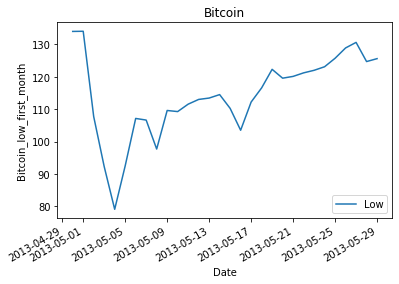

<Figure size 432x288 with 0 Axes>

In [3]:
bitcoin.head()
bitcoin['Quantum'] = bitcoin['Low'] - bitcoin['Low'].shift()
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
first_month_df = bitcoin.head(30)
last_month_df = bitcoin.tail(30)
first_month_df.plot('Date', 'Low')
plt.ylabel('Bitcoin_low_first_month')
plt.title('Bitcoin')
plt.show()
plt.savefig('Bitcoin_low_first_month.pdf')


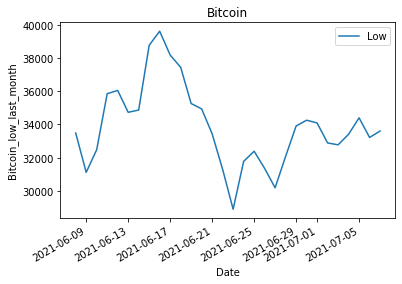

<Figure size 432x288 with 0 Axes>

In [4]:
last_month_df.plot('Date', 'Low')
plt.ylabel('Bitcoin_low_last_month')
plt.title('Bitcoin')
plt.show()
plt.savefig('Bitcoin_low_last_month.pdf')

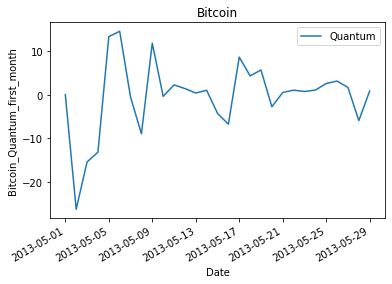

<Figure size 432x288 with 0 Axes>

In [5]:
first_month_df.plot('Date', 'Quantum')
plt.ylabel('Bitcoin_Quantum_first_month')
plt.title('Bitcoin')
plt.show()
plt.savefig('Bitcoin_Quantum_first_month.pdf')

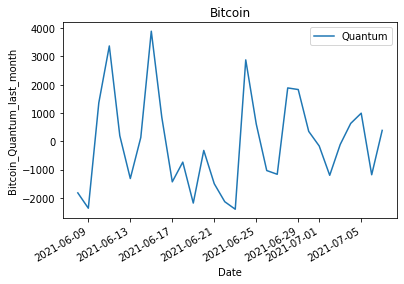

<Figure size 432x288 with 0 Axes>

In [6]:
last_month_df.plot('Date', 'Quantum')
plt.ylabel('Bitcoin_Quantum_last_month')
plt.title('Bitcoin')
plt.show()
plt.savefig('Bitcoin_Quantum_last_month.pdf')

### Plot Ethereum’s ‘High’ for first 15 and last 10 days.

In [7]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
first_15_days = ethereum.head(15)
last_10_days = ethereum.tail(10)


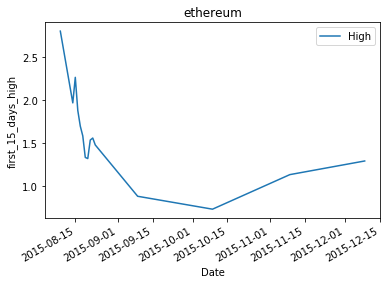

<Figure size 432x288 with 0 Axes>

In [8]:
# first 15 days 
first_15_days.plot('Date', 'High')
plt.ylabel('first_15_days_high')
plt.title('ethereum')
plt.show()
plt.savefig('first_15_days_high_ethereum.pdf')


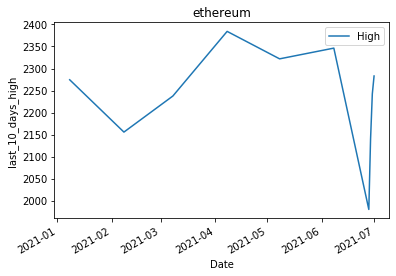

<Figure size 432x288 with 0 Axes>

In [9]:
#Last 10 days high
last_10_days.plot('Date', 'High')
plt.ylabel('last_10_days_high')
plt.title('ethereum')
plt.show()
plt.savefig('last_10_days_high_ethereum.pdf')

### 3. Plot 5 day Moving/Rolling Average of Volume Traded for every coin in given period: [01/01/20 – 31/01/20]

In [10]:
def moving_average(df, col_name, num_days, start_date, end_date, date_col):
    '''col_name should string whose moving avg is to be found
    date_col is Date'''
    
    df['Moving_avg'] = df[col_name].rolling(num_days).mean()
    if df[date_col].dtype != '<M8[ns]':
        df[date_col] = pd.to_datetime(df[date_col])
        mask = (df[date_col] > start_date) & (df[date_col] <= end_date)
        temp = df[mask]
        temp.plot(date_col, 'Moving_avg')
    else:
        mask = (df[date_col] > start_date) & (df[date_col] <= end_date)
        temp = df[mask]
        temp.plot(date_col, 'Moving_avg')

In [11]:
var = 5
print(f"{var}")

5


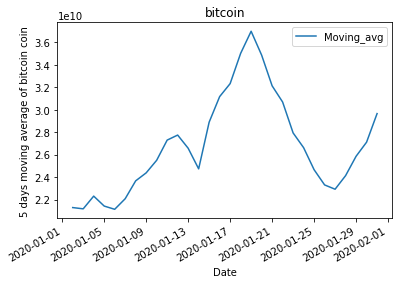

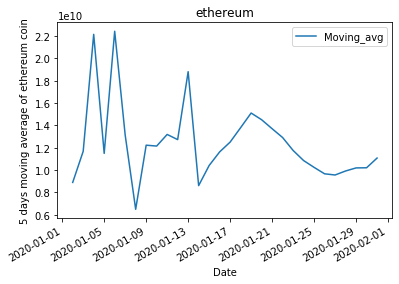

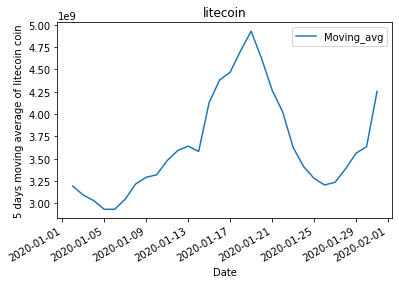

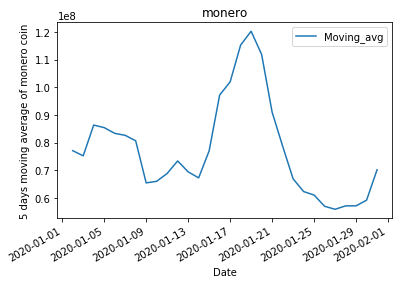

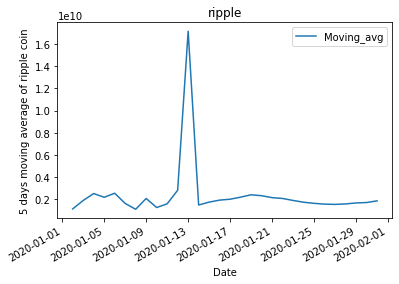

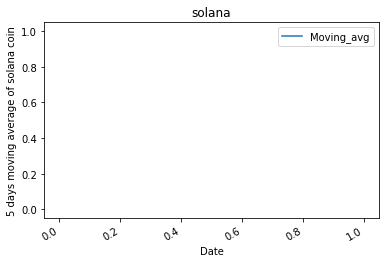

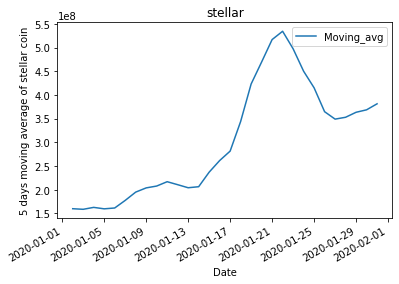

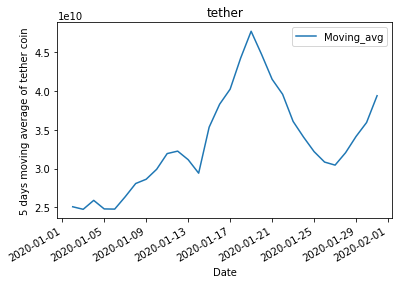

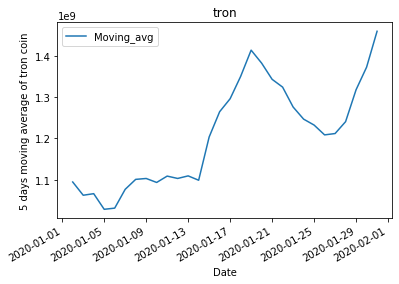

In [12]:
dfs = [bitcoin, ethereum, litecoin, monero, ripple, solana, stellar, tether, tron]
coins = ['bitcoin', 'ethereum', 'litecoin', 'monero', 'ripple', 'solana', 'stellar', 'tether', 'tron']
col_name = 'Volume'
start_date = '01-01-20'
end_date = '31-01-20'
date_col = 'Date'
for df, name in zip(dfs, coins):
    moving_average(df, col_name, 5, start_date, end_date,date_col)
    plt.ylabel(f'5 days moving average of {name} coin')
    plt.title(f'{name}')
    plt.savefig(f'5 days moving average of {name} coin.pdf')

### 4. Compare Market Cap of all coins at 01/04/20 and 01/04/21. [multiple type of graphs is preferred

In [13]:
dfs = [bitcoin, ethereum, litecoin, monero, ripple, solana, stellar, tether, tron]
coins = ['bitcoin', 'ethereum', 'litecoin', 'monero', 'ripple', 'solana', 'stellar', 'tether', 'tron']
# creating new dataframe of marketcap of all coins
start_date = '01-04-20'
end_date = '01-04-21'
marketcap = pd.DataFrame()
for df, name in zip(dfs, coins):
    mask = (df[date_col] > start_date) & (df[date_col] <= end_date)
    marketcap[name] = df[mask]['Marketcap']
marketcap

,bitcoin,ethereum,litecoin,monero,ripple,solana,stellar,tether,tron
2441,1.344425e+11,NaN,2.763618e+09,NaN,8.270834e+09,NaN,NaN,NaN,NaN
2442,1.344695e+11,NaN,2.778397e+09,NaN,8.361930e+09,NaN,NaN,NaN,NaN
2443,1.409765e+11,NaN,2.923126e+09,NaN,8.273953e+09,NaN,NaN,NaN,NaN
2444,1.481522e+11,NaN,2.962311e+09,NaN,8.168316e+09,NaN,NaN,NaN,NaN
2445,1.466452e+11,NaN,2.913486e+09,NaN,7.989127e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2802,5.360338e+11,NaN,8.571310e+09,NaN,NaN,NaN,NaN,NaN,NaN
2803,5.390511e+11,NaN,8.256036e+09,NaN,NaN,NaN,NaN,NaN,NaN
2804,5.460016e+11,NaN,8.358909e+09,NaN,NaN,NaN,NaN,NaN,NaN
2805,5.972059e+11,NaN,9.069424e+09,NaN,NaN,NaN,NaN,NaN,NaN


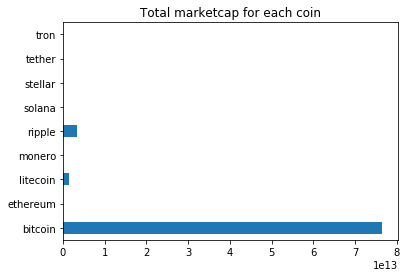

In [14]:
marketcap.sum().plot.barh()
plt.title('Total marketcap for each coin')
plt.savefig('Total marketcap for each coin.pdf')

### 5. Represent initial sale date for every token according to data provided

In [15]:
dfs = [bitcoin, ethereum, litecoin, monero, ripple, solana, stellar, tether, tron]
coins = ['bitcoin', 'ethereum', 'litecoin', 'monero', 'ripple', 'solana', 'stellar', 'tether', 'tron']
initial_sale_dict = {}
for name, da in zip(coins, dfs):
    initial_sale_dict[name] = (df['Date']).iloc[0]
initial_sale_dict

{'bitcoin': Timestamp('2017-09-14 23:59:59'),
 'ethereum': Timestamp('2017-09-14 23:59:59'),
 'litecoin': Timestamp('2017-09-14 23:59:59'),
 'monero': Timestamp('2017-09-14 23:59:59'),
 'ripple': Timestamp('2017-09-14 23:59:59'),
 'solana': Timestamp('2017-09-14 23:59:59'),
 'stellar': Timestamp('2017-09-14 23:59:59'),
 'tether': Timestamp('2017-09-14 23:59:59'),
 'tron': Timestamp('2017-09-14 23:59:59')}

### 6. Plot candlestick charts for all coins for their respective timeframe provided in dataset

In [16]:
def candle_stict_chart(df, coin):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],                       
    increasing_line_color='orange',
    decreasing_line_color = 'black'
    )])
    fig.update_layout(title=f"candle stick chart of {coin}")
    fig.show()

In [3]:
dfs = [bitcoin, ethereum, litecoin, monero, ripple, solana, stellar, tether, tron]
coins = ['bitcoin', 'ethereum', 'litecoin', 'monero', 'ripple', 'solana', 'stellar', 'tether', 'tron']
for df, name in zip(dfs, coins):
    candle_stict_chart(df, name)

NameError: name 'bitcoin' is not defined

### 7. Build a scatter plot for ‘Close’ Values of ETH and BTC for years: 2016,17,18 & 19.

In [18]:
def split_date_time(df):
    df['Year'] = pd.DatetimeIndex(df["Date"]).year
    return df

In [19]:
btc_close = bitcoin['Close'][split_date_time(bitcoin)['Year'].apply(lambda x: x in [2016, 2017, 2018, 2019])]
eth_close = ethereum['Close'][split_date_time(ethereum)['Year'].apply(lambda x: x in [2016, 2017, 2018, 2019])]

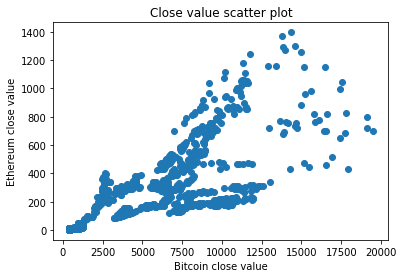

In [20]:
plt.scatter(btc_close, eth_close)
plt.title('Close value scatter plot')
plt.xlabel('Bitcoin close value')
plt.ylabel('Ethereum close value')
plt.savefig('Close value scatter plot.pdf')

### 8. further EDA to generate valuable insights.

#### 8.1 Univariate analysis 

In [21]:
dfs = [bitcoin, ethereum, litecoin, monero, ripple, solana, stellar, tether, tron]
coins = ['bitcoin', 'ethereum', 'litecoin', 'monero', 'ripple', 'solana', 'stellar', 'tether', 'tron']

In [22]:
# Outer detections in volume
volumes = pd.DataFrame()
for df, name in zip(dfs, coins):
    volumes[name] = df['Volume']


C:\Users\KRISHNA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



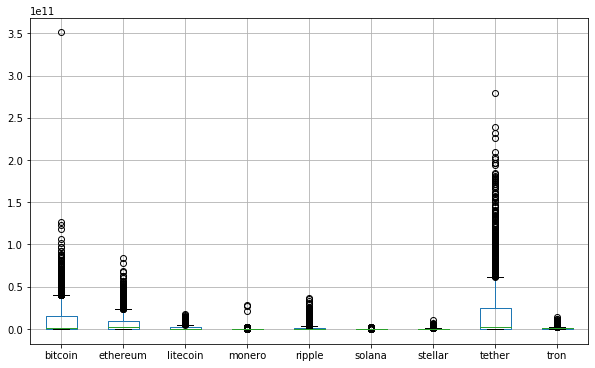

In [23]:
plt.figure(figsize = (10,6))
volumes.boxplot()

### Observation
1. tether has large outerlier compared to other means more risky 

Text(0, 0.5, 'Volume')

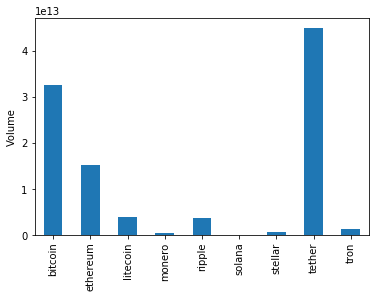

In [24]:
import warnings
warnings.filterwarnings("ignore")
volumes.sum().plot.bar()
plt.ylabel('Volume')

In [25]:
market_cap = pd.DataFrame()
for df, name in zip(dfs, coins):
    market_cap[name] = df['Marketcap']

Text(0, 0.5, 'Total market cap')

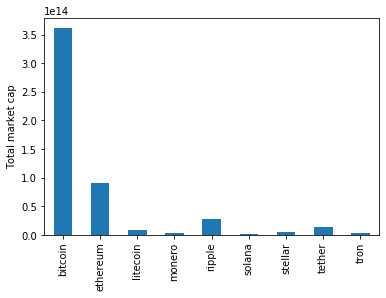

In [26]:
market_cap.sum().plot.bar()
plt.ylabel('Total market cap')